In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load the csv file
df = pd.read_csv('spam.csv')
df.sample(5)

,Category,Message
878,spam,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...
3406,ham,"Jus chillaxin, what up"
3432,ham,Yeah if we do have to get a random dude we nee...
4913,ham,I am on the way to tirupur.
1110,ham,S s..first time..dhoni rocks...


### Exploratory Data Analysis(EDA)
Explore the dataset to gain more insights

In [3]:
# total number of rows and columns
df.shape

(5572, 2)

In [4]:
# check missing values
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [5]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [6]:
df['spam-ham'] = df['Category'].apply(lambda x:1 if x=='spam' else 0)
df.head()

,Category,Message,spam-ham
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


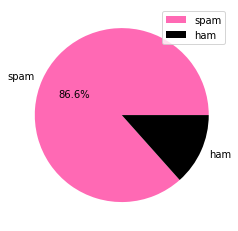

In [7]:
#Check category variable which has 0 value as ham and 1 for spam
plt.subplots(1, 1)
plt.pie(df.Category.value_counts(),autopct='%1.1f%%', labels=['spam','ham'], colors=['hotpink','k'])
plt.legend()
plt.show()

### Split data into training and test dataset

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['Message'],df['spam-ham'])

Now we have to convert a collection of text documents to a matrix of token counts. For this we will use sklearn CountVectorizer

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_count = cv.fit_transform(X_train.values)
X_train_count.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification)

In [10]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_count,y_train)

MultinomialNB()

In [11]:
emails = [
    'Hey Priya, can we get together to watch movie tomorrow?',
    'Congratulation!! you won a reward of 10000$'
]
emails_count = cv.transform(emails)
nb.predict(emails_count)

array([0, 1])

In [12]:
X_test_count = cv.transform(X_test)
nb.score(X_test_count, y_test)

0.9842067480258435

### sklearn pipeline
The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.
Intermediate steps of the pipeline must be ‘transforms’, i.e., they must implement fit and transform methods. The final estimator only needs to implement fit. The transformers in the pipeline can be cached using memory argument.

In [13]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('cv', CountVectorizer()),
    ('MNB', MultinomialNB())
    ])
pipeline.fit(X_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('MNB', MultinomialNB())])

In [14]:
pipeline.score(X_test,y_test)

0.9842067480258435

In [15]:
pipeline.predict(emails)

array([0, 1])